In [52]:
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [2]:
base_path = pathlib.Path.cwd().parent
business_path = base_path.joinpath('data_lake/business/')
data = pd.read_csv(business_path.joinpath('precios-diarios.csv'), index_col=0)
data.index = pd.to_datetime(data.index)


<AxesSubplot:>

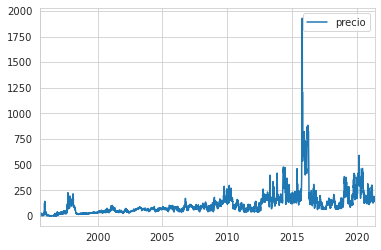

In [84]:
data.plot()

In [85]:
n_lags = [30, 60]

list_lags = [0] + list(range(1, n_lags[0])) + list(range(n_lags[0], n_lags[1] ))[::2]

df_lag = data.copy()
df_lags = pd.concat([df_lag.shift(shift) for shift in list_lags], axis=1)
df_lags = df_lags.dropna()
df_lags.columns = list_lags
df_lags

,0,1,2,3,4,5,6,7,8,9,...,40,42,44,46,48,50,52,54,56,58
1995-09-16,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,...,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167,1.392091
1995-09-17,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,...,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167,2.559708
1995-09-18,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,...,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167
1995-09-19,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,...,17.051292,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167
1995-09-20,12.141667,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,...,19.775000,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,...,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333,241.612083
2021-04-28,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,...,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333,208.596667
2021-04-29,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,...,145.734167,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333
2021-04-30,157.586667,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,...,126.096667,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333


,0,1,2,3,4,5,6,7,8,9,...,40,42,44,46,48,50,52,54,56,58
1995-09-16,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,...,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167,1.392091
1995-09-17,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,...,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167,2.559708
1995-09-18,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,...,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167
1995-09-19,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,...,17.051292,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167
1995-09-20,12.141667,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,...,19.775000,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,...,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333,241.612083
2021-04-28,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,...,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333,208.596667
2021-04-29,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,...,145.734167,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333
2021-04-30,157.586667,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,...,126.096667,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333


<AxesSubplot:>

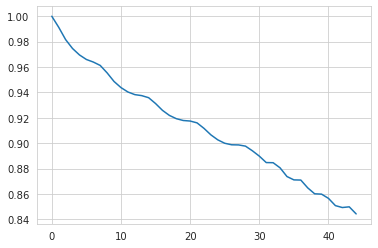

In [70]:
df_lag = data.copy().diff(periods=1)
method = 'spearman'
corrs = df_lags.corr(method=method)
corrs = corrs.reset_index(drop=True)

corrs.iloc[:, 0].plot()

In [71]:
end_data_train = int(len(df_lags) * 0.70)
star_data_test = end_data_train + n_lags[1]

X = df_lags.copy().drop(columns=[0])
y = df_lags.copy().iloc[:, [0]]

X_train = X.iloc[:end_data_train]
y_train = y.iloc[:end_data_train]

X_test = X.iloc[star_data_test:]
y_test = y.iloc[star_data_test:]

end_data_train, star_data_test

(6552, 6612)

In [72]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,40,42,44,46,48,50,52,54,56,58
1995-09-16,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,14.041667,...,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167,1.392091
1995-09-17,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,...,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167,2.559708
1995-09-18,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,...,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167
1995-09-19,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,...,17.051292,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167
1995-09-20,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,...,19.775000,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-19,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,181.825279,196.596920,181.197120,...,335.858013,292.329651,203.831287,175.026763,160.328255,137.783686,179.668091,194.735106,163.401007,144.118372
2013-08-20,134.485023,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,181.825279,196.596920,...,323.202634,318.903186,219.185331,189.253459,179.107243,141.672222,172.006661,188.320542,191.979858,149.768745
2013-08-21,137.397482,134.485023,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,181.825279,...,319.941448,335.858013,292.329651,203.831287,175.026763,160.328255,137.783686,179.668091,194.735106,163.401007
2013-08-22,128.986728,137.397482,134.485023,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,...,251.282813,323.202634,318.903186,219.185331,189.253459,179.107243,141.672222,172.006661,188.320542,191.979858


In [73]:
X_test

,1,2,3,4,5,6,7,8,9,10,...,40,42,44,46,48,50,52,54,56,58
2013-10-23,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,176.921417,178.210024,166.223755,...,152.967472,147.537436,129.911353,130.082664,138.992283,157.847668,152.086526,102.451840,102.759997,124.473979
2013-10-24,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,176.921417,178.210024,...,153.481390,143.943703,137.421325,101.969089,138.105008,141.408316,143.930335,148.881151,96.401663,122.815434
2013-10-25,275.734530,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,176.921417,...,151.125655,152.967472,147.537436,129.911353,130.082664,138.992283,157.847668,152.086526,102.451840,102.759997
2013-10-26,269.062516,275.734530,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,...,128.957898,153.481390,143.943703,137.421325,101.969089,138.105008,141.408316,143.930335,148.881151,96.401663
2013-10-27,260.833299,269.062516,275.734530,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,...,161.341236,151.125655,152.967472,147.537436,129.911353,130.082664,138.992283,157.847668,152.086526,102.451840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,164.631667,...,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333,241.612083
2021-04-28,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,...,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333,208.596667
2021-04-29,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,...,145.734167,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333
2021-04-30,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,...,126.096667,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333


<AxesSubplot:>

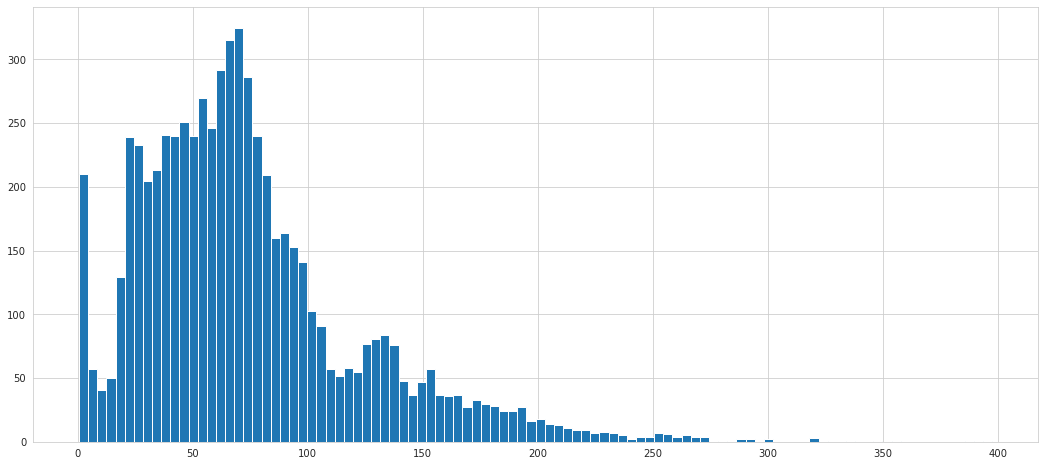

In [74]:
X_train.iloc[:, 0].hist(bins=100, figsize=(18, 8))

In [75]:
X_train.iloc[:, [0]].quantile(np.arange(0, 1.01, 0.01))

,1
0.00,0.500000
0.01,1.766783
0.02,2.700158
0.03,3.903761
0.04,7.803960
...,...
0.96,181.819331
0.97,191.676506
0.98,206.103940
0.99,233.962052


In [76]:
scaler_x = preprocessing.RobustScaler(
    with_centering=True, with_scaling=True, quantile_range=(10, 90)
)
scaler_x.fit(X_train)

X_train_scaled = pd.DataFrame(scaler_x.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler_x.transform(X_test), index=X_test.index, columns=X_test.columns)

scaler_y = preprocessing.RobustScaler(
    with_centering=True, with_scaling=True, quantile_range=(10, 90)
)
scaler_y.fit(y_train)

y_train_scaled = pd.DataFrame(scaler_y.transform(y_train), index=y_train.index, columns=y_train.columns)
y_test_scaled = pd.DataFrame(scaler_y.transform(y_test), index=y_test.index, columns=y_test.columns)


<AxesSubplot:>

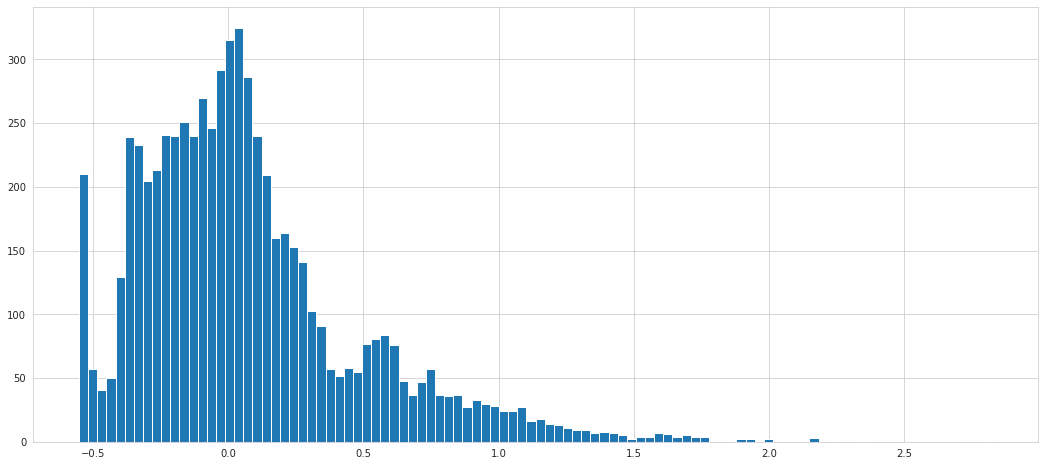

In [77]:
X_train_scaled.iloc[:, 0].hist(bins=100, figsize=(18, 8))

In [78]:
pca = PCA(n_components=len(X_train_scaled.columns))
pca.fit(X_train_scaled)

PCA(n_components=44)

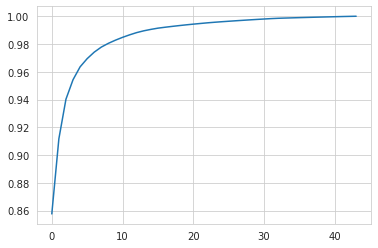

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

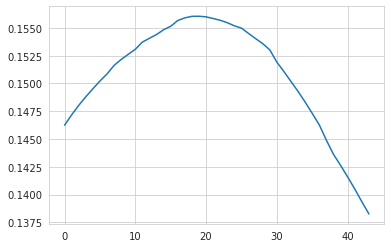

In [80]:
plt.plot(pca.components_[0])